# Part 1 of the assignment

Performing Logistic regression using Python from scratch.
This includes performing it with raw data, normalized data and standardized data


importing all the libraries that are been used and plot setup.

In [53]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import os
plt.rcParams["figure.figsize"] = (10, 6)


Now we will load, visualize and divide the given dataset.

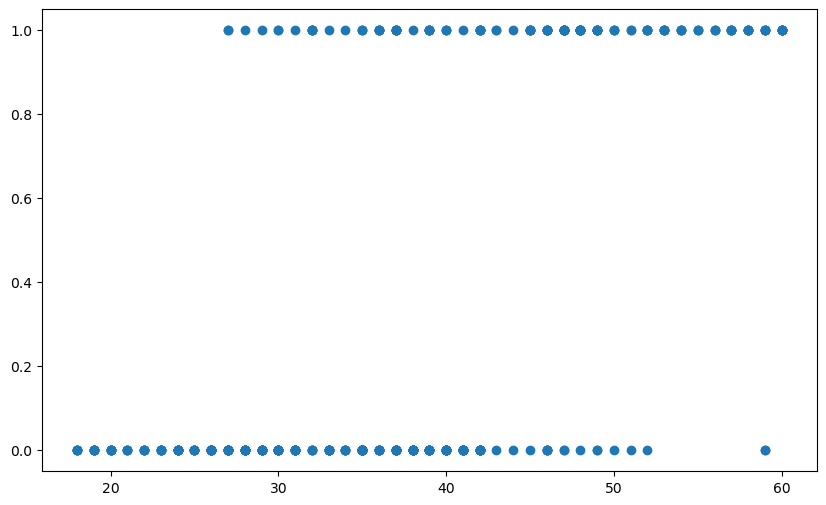

In [54]:
# Load the data
data = pd.read_csv("C:\\Users\\nimes\\OneDrive\\Desktop\\220907_Rohan Nimesh\\assignment_2\\Social_Network_Ads (1).csv")
data.head()

# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()


# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.30)

Next up we will make the normalization and standardization function form scratch and make a function to make prediction.

In [55]:


# function to normalize data
def normalize(X):
    return (X - X.min())/(X.max()-X.min())

# function to standardize data
def standardize(X):
    return (X - X.mean())/(X.std())

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1 * b0 + -1 * b1 * x)) for x in X])


Following is the code for the Logistic regression model with raw data .

In [56]:
# Method to train the model for norm model
def logistic_regression(X, Y):

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)

        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1

        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
y_pred = predict(X_test, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]


Following is the code for the Logistic regression model using the normalized data.

In [57]:
# Method to train the model for norm model
def logistic_regression(X, Y):
    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred_norm = predict(X, b0, b1)

        D_b0 = -2 * sum((Y - y_pred_norm) * y_pred_norm * (1 - y_pred_norm))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred_norm) * y_pred_norm * (1 - y_pred_norm))  # Derivative of loss wrt b1

        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred_norm = predict(X_test_norm, b0, b1)
y_pred_norm = [1 if p >= 0.5 else 0 for p in y_pred_norm]

Following is the code for the Logistic regression model using the standardized data.

In [58]:
# Method to train the model for std model
def logistic_regression(X, Y):
    X = standardize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred_std = predict(X, b0, b1)

        D_b0 = -2 * sum((Y - y_pred_std) * y_pred_std * (1 - y_pred_std))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred_std) * y_pred_std * (1 - y_pred_std))  # Derivative of loss wrt b1

        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1

    return b0, b1

# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_std = standardize(X_test)
y_pred_std = predict(X_test_std, b0, b1)
y_pred_std = [1 if p >= 0.5 else 0 for p in y_pred_std]

Following is the code for the scatter plot.

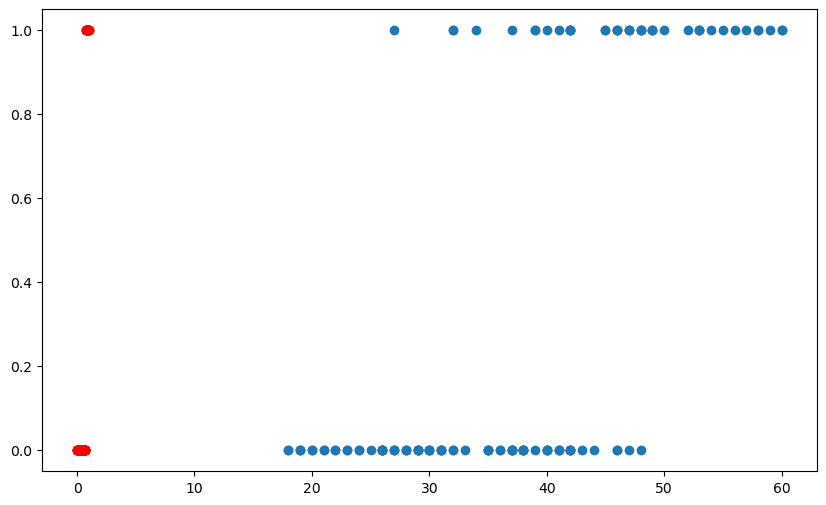

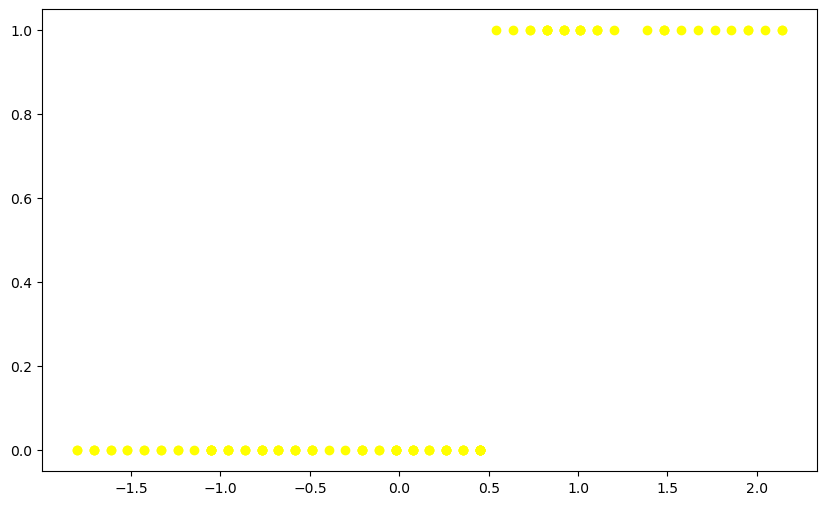

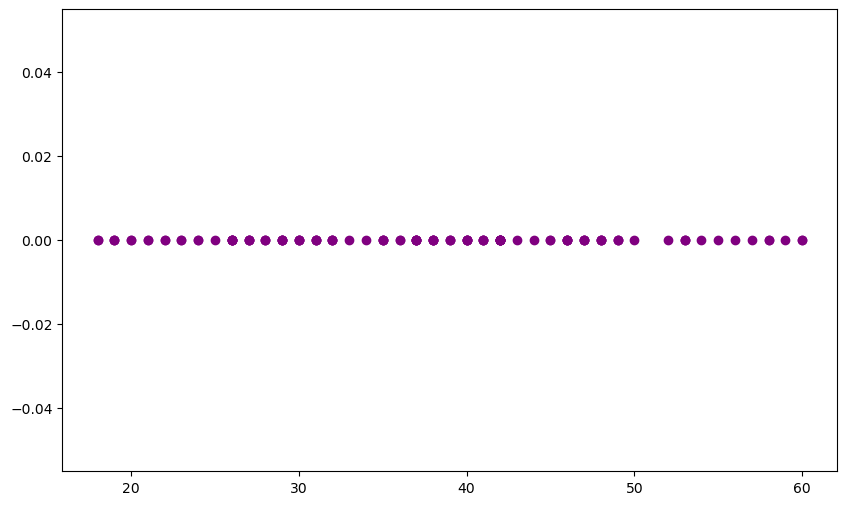

In [59]:
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test_norm, y_pred_norm, c="red")
plt.show()

plt.clf()
plt.scatter(X_test_std, y_pred_std, c="yellow")
plt.show()

plt.clf()
plt.scatter(X_test, y_pred, c="purple")
plt.show()


Following is the code to calculate the accuracy of different models.

In [60]:
# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy_raw = {accuracy / len(y_pred)}")

# The accuracy norm
accuracy = 0
for i in range(len(y_pred_norm)):
    if y_pred_norm[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy_norm = {accuracy / len(y_pred_norm)}")

# The accuracy std
accuracy = 0
for i in range(len(y_pred_std)):
    if y_pred_std[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy_std = {accuracy / len(y_pred_std)}")


Accuracy_raw = 0.6583333333333333
Accuracy_norm = 0.8
Accuracy_std = 0.8416666666666667


Now we will move to do the same thing using sk learn.

we have already imported the libraries and have already devided the data into training and testing data sets.

Following is the code for the Logistic regression model where we used raw data

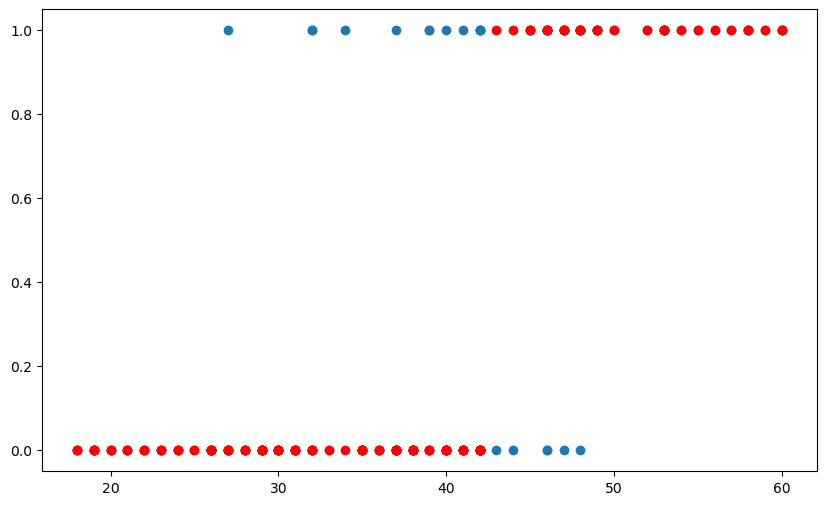

Accuracy_raw = 0.8416666666666667


In [61]:
# Making predictions using scikit-learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.ravel())  # Use ravel() to flatten y_train

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy_raw = {lr_model.score(X_test.values.reshape(-1, 1), y_test.ravel())}")  # Use ravel() to flatten y_test

Following is the code for the Logistic regression model where we used the normalized data usking sk learn.

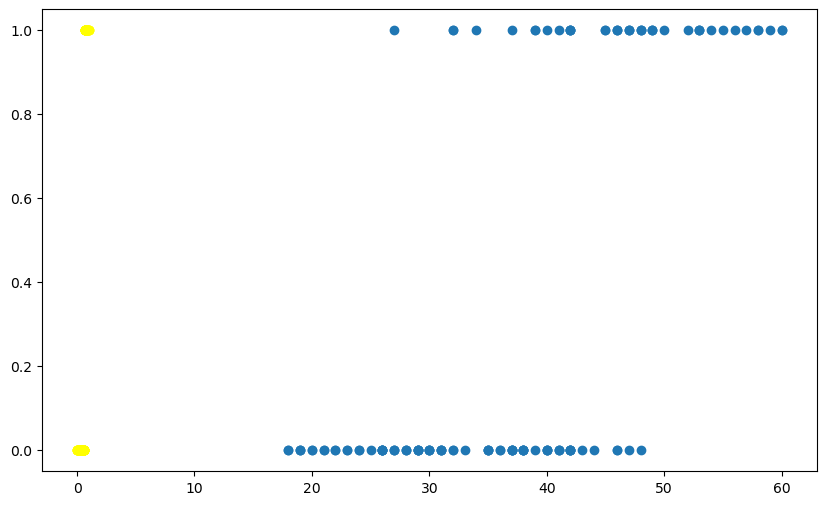

Accuracy_norm = 0.8583333333333333


In [62]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train.values.reshape(-1, 1))  # Reshape X_train to 2D array

# transform training data
X_train_norm = norm.transform(X_train.values.reshape(-1, 1))

# transform testing data
X_test_norm = norm.transform(X_test.values.reshape(-1, 1))

# Create an instance and fit the model
lr_model_norm = LogisticRegression()
lr_model_norm.fit(X_train_norm, y_train.ravel())  # Use ravel() to flatten y_train

# Making predictions
y_pred_sk_norm = lr_model_norm.predict(X_test_norm)

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test_norm, y_pred_sk_norm, c="yellow")
plt.show()

# Accuracy
print(f"Accuracy_norm = {lr_model_norm.score(X_test_norm, y_test.ravel())}")  # Use ravel() to flatten y_test

Following is the code for the Logistic regression model where we used the standardized data usking sk learn.

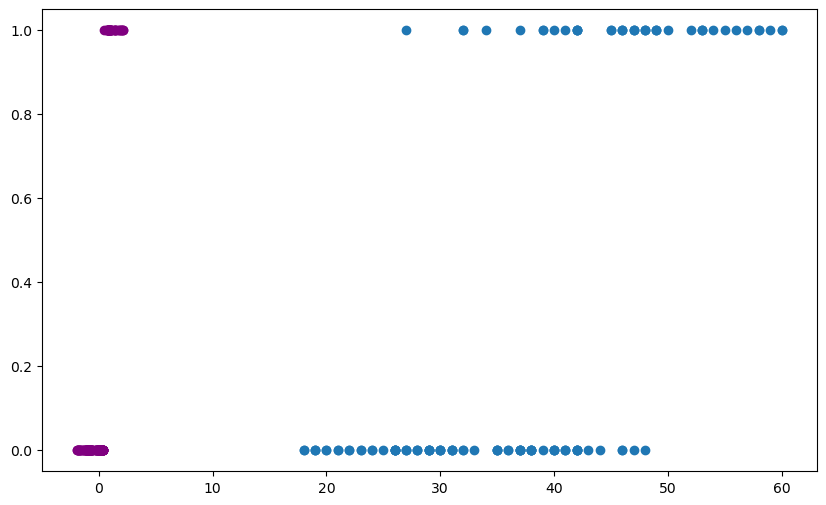

Accuracy_Standardized: 0.8416666666666667


In [63]:
from sklearn.preprocessing import StandardScaler
# Data standardization with sklearn
scaler = StandardScaler()

# Fit the scaler on training data
X_train_stand = scaler.fit_transform(X_train.values.reshape(-1, 1))

# Transform training data
X_test_stand = scaler.transform(X_test.values.reshape(-1, 1))

# Create an instance and fit the model on standardized data
lr_model_stand = LogisticRegression()
lr_model_stand.fit(X_train_stand, y_train.ravel())  # Use ravel() to flatten y_train

# Making predictions
y_pred_stand = lr_model_stand.predict(X_test_stand)

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test_stand, y_pred_stand, c="purple")
plt.show()

# Accuracy
accuracy_stand = lr_model_stand.score(X_test_stand, y_test.ravel())  # Use ravel() to flatten y_test
print(f"Accuracy_Standardized: {accuracy_stand}")


# Part 2 of the assignment


Importing libraries 

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Loading the data set and Mapping the species

In [65]:
# Load the Iris dataset
iris_data = pd.read_csv("C:\\Users\\nimes\\OneDrive\\Desktop\\220907_Rohan Nimesh\\assignment_2\\Iris.csv")

# Map species to numeric labels
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['Species'] = iris_data['Species'].map(species_mapping)


Dataset plot

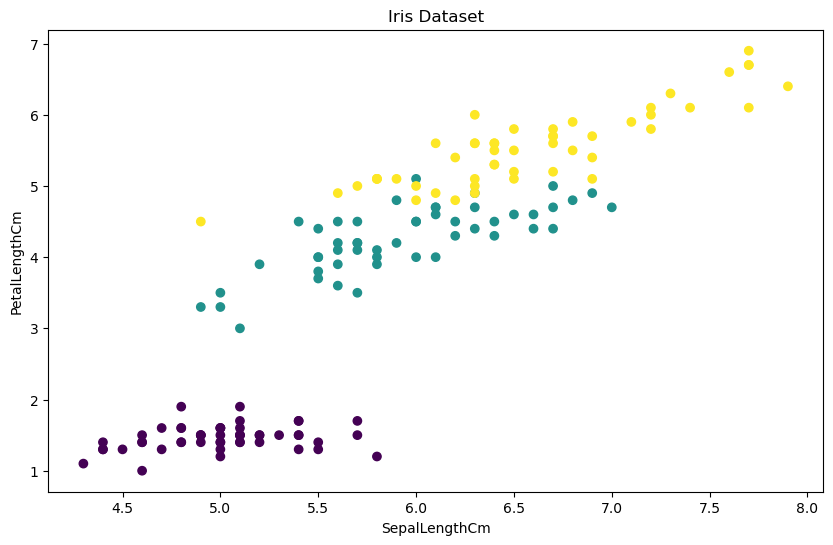

In [66]:

plt.scatter(iris_data['SepalLengthCm'], iris_data['PetalLengthCm'], c=iris_data['Species'], cmap='viridis')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Iris Dataset')
plt.show()


Splitting the data

In [71]:
# Prepare the data
X = iris_data[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = iris_data['Species'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Implimenting KNN from sratch and claculating its accuracy

In [72]:

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_neighbors_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

def knn_predict_batch(X_train, y_train, X_test, k):
    return [knn_predict(X_train, y_train, x_test, k) for x_test in X_test]

# random value for k
k_value = 5

# Make predictions using the k-NN from scratch
y_pred_scratch = knn_predict_batch(X_train, y_train, X_test, k_value)

# Calculate accuracy
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy_scratch: {accuracy_scratch}")

Accuracy_scratch: 1.0


Implimenting KNN using sk learn and calculating its accuracy

In [73]:

knn_sklearn = KNeighborsClassifier(n_neighbors=k_value)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy_sk-learn: {accuracy_sklearn}")


Accuracy_sk-learn: 1.0


Plotting accuracy vs k value for both scratch and sk learn 
when the below code is runned it seems the accuracy is not dependent on the vlaue of k one of the reason might be that the data set is not commplex 

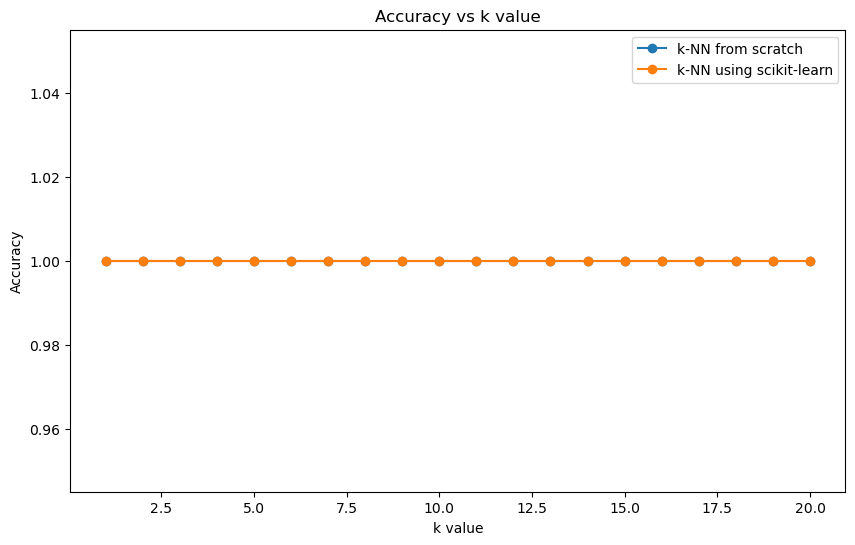

In [74]:

k_values = range(1, 21)
accuracy_values_scratch = []
accuracy_values_sklearn = []

for k in k_values:
    # Scratch
    y_pred_scratch = knn_predict_batch(X_train, y_train, X_test, k)
    accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
    accuracy_values_scratch.append(accuracy_scratch)

    # Scikit-learn
    knn_sklearn = KNeighborsClassifier(n_neighbors=k)
    knn_sklearn.fit(X_train, y_train)
    y_pred_sklearn = knn_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    accuracy_values_sklearn.append(accuracy_sklearn)

# Plot the accuracy vs k value for both scratch and sk learn
plt.plot(k_values, accuracy_values_scratch, marker='o', label='k-NN from scratch')
plt.plot(k_values, accuracy_values_sklearn, marker='o', label='k-NN using scikit-learn')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value')
plt.legend()
plt.show()